In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import svm
import seaborn as sns
from sklearn.model_selection import cross_val_score

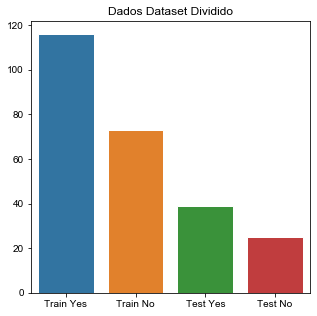

In [2]:
dataset_folder = 'brain_tumor_dataset/'
dataset_dividido_folder = 'brain_tumor_dataset_dividido_v2/'

treino_folder = 'treino/'
teste_folder = 'teste/'

yes = 'yes/'
no = 'no/'

dataset_dividido_folder_treino = dataset_dividido_folder + treino_folder
dataset_dividido_folder_teste = dataset_dividido_folder + teste_folder

dir_train_yes = os.listdir(dataset_dividido_folder_treino + yes)
dir_train_no = os.listdir(dataset_dividido_folder_treino + no)
dir_test_yes = os.listdir(dataset_dividido_folder_teste + yes)
dir_test_no = os.listdir(dataset_dividido_folder_teste + no)
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('whitegrid')
grafico = sns.barplot(ax = ax, x=['Train Yes','Train No','Test Yes','Test No'], y=[len(dir_train_yes),len(dir_train_no),len(dir_test_yes),len(dir_test_no)])
grafico.set_title('Dados Dataset Dividido')
plt.show()

In [3]:
seed = 123
dados_size = 253

datagen = ImageDataGenerator(rescale = 1./255)

dados = datagen.flow_from_directory(
    dataset_folder,
    target_size = (150,150),
    color_mode = "grayscale",
    batch_size = dados_size,
    class_mode="binary")

Found 253 images belonging to 2 classes.


In [4]:
x_data = []
y_data = []

for inputs_batch, labels_batch in dados:
    for i, img in enumerate(inputs_batch):
        x_data.append(img.reshape(22500))
        y_data.append(labels_batch[i])
    break
    
x_data = np.array(x_data)
y_data = np.array(y_data)

In [13]:
def build_model():
    model = svm.SVC(kernel='rbf',C=1)
    return model

In [23]:
model = build_model()

kernels = ['linear', 'rbf', 'poly','sigmoid']
for kernel in kernels:
    svc = svm.SVC(kernel=kernel)
    scores = cross_val_score(svc, x_data, y_data, cv = 5)
    print('Kernel', kernel)
    print(scores)
    print(scores.mean())

Kernel linear
[0.70588235 0.74509804 0.70588235 0.9        0.76      ]
0.7633725490196079
Kernel rbf
[0.78431373 0.82352941 0.68627451 0.88       0.8       ]
0.7948235294117646
Kernel poly
[0.74509804 0.76470588 0.70588235 0.86       0.74      ]
0.7631372549019607
Kernel sigmoid
[0.37254902 0.41176471 0.43137255 0.44       0.44      ]
0.4191372549019608
